In [1]:
# Import The Libraries 
import  pandas as pd
import  numpy as np
import glob,cv2
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Activation,Input, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set Resize variable
IMAGE_SIZE = [224, 224]

resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

for layer in resnet.layers:
    layer.trainable = False


In [23]:
train_Path = './drive/MyDrive/Colab Notebooks/dataset/train'
test_Path = './drive/MyDrive/Colab Notebooks/dataset/test'
folders = glob.glob(train_Path + '/*')
image_label = ['normal', 'fire']
folders

['./drive/MyDrive/Colab Notebooks/dataset/train/normal',
 './drive/MyDrive/Colab Notebooks/dataset/train/fire']

In [24]:
x = Flatten() (resnet.output)
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = resnet.input, outputs = prediction)
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [25]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [26]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 763 images belonging to 2 classes.


In [27]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 77 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 200,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/200
24/24 [==============================] - 172s 7s/step - loss: 1.5005 - accuracy: 0.6317 - val_loss: 0.9619 - val_accuracy: 0.5844
Epoch 2/200
24/24 [==============================] - 153s 6s/step - loss: 0.6722 - accuracy: 0.6855 - val_loss: 1.1979 - val_accuracy: 0.4935
Epoch 3/200
24/24 [==============================] - 157s 6s/step - loss: 0.8899 - accuracy: 0.6304 - val_loss: 1.4141 - val_accuracy: 0.4935
Epoch 4/200
24/24 [==============================] - 154s 6s/step - loss: 0.7384 - accuracy: 0.6972 - val_loss: 1.1450 - val_accuracy: 0.5584
Epoch 5/200
24/24 [==============================] - 153s 6s/step - loss: 0.5522 - accuracy: 0.7562 - val_loss: 0.5334 - val_accuracy: 0.7143
Epoch 6/200
24/24 [==============================] - 152s 6s/step - loss: 0.4818 - accuracy: 0.7680 - val_loss: 0.8152 - val_accuracy: 0.5844
Epoch 7/200
24/24 [==============================] - 153s 6s/step - loss: 0.5536 - accuracy: 0.7431 - val_loss: 0.3771 - val_accuracy: 0.7922
Epoch 

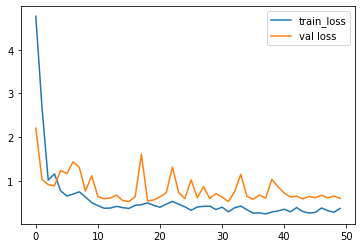

In [12]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

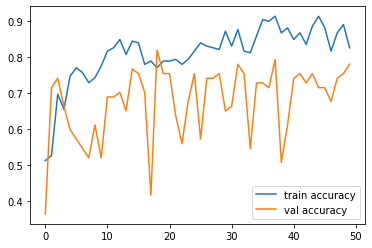

In [13]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [14]:
prediction = model.predict(test_set)
prediction = np.argmax(prediction, axis = 1)
prediction

In [22]:
print(classification_report(test_set.labels,prediction))

              precision    recall  f1-score   support

           0       0.17      0.10      0.12        21
           1       0.71      0.82      0.76        56

    accuracy                           0.62        77
   macro avg       0.44      0.46      0.44        77
weighted avg       0.56      0.62      0.59        77



In [ ]:
def unseen_data_test(path, image_name, model):
    img = image.load_img(path + image_name, target_size = IMAGE_SIZE)
    print('Original Image')
#     print(img)
    plt.imshow(img)
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis = 0)
    img_data = preprocess_input(x)
    result = np.argmax(model.predict(img_data), axis = 1)
    
    return result